In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raptor_team = pd.read_csv("../Data/historical_RAPTOR_by_team.csv")
raptor_player = pd.read_csv("../Data/historical_RAPTOR_by_player.csv")

### Preprocessing

#### Combine both aggregate and data split by reg season & post season for RAPTOR data.

In [3]:
raptor_player.tail()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
18548,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128
18549,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
18550,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
18551,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
18552,Ivica Zubac,zubaciv01,2021,3908,1910,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


In [4]:
raptor_player["season_type"] = ["TOT"]*raptor_player.shape[0]
raptor_player["team"] = [np.nan]*raptor_player.shape[0]
raptor_player = raptor_player[list(raptor_team.columns)]
raptor = pd.concat([raptor_player,raptor_team])
raptor

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29039,Ivica Zubac,zubaciv01,2019,RS,LAL,1120,516,-1.450572,1.532064,0.081491,0.745271,0.745271,0.000000,-2.387528,1.045695,-1.341833,-0.021405
29040,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691
29041,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144
29042,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


#### Convert `Season` to numeric for `salary_caps` and `salaries` data
---
`Season` in RAPTOR corresponds to the ending year of the season so 2021 is equivalent to the 2020-21 season. Since 2021 is easier to work with, we'll be converting to that.

In [5]:
salary_caps = pd.read_excel("../Data/salary_caps.xlsx", header = None)
salary_caps.columns = ["Season", "Salary Cap", "Adjusted"]
salaries = pd.read_csv("../Data/player_salaries.csv", index_col=[0])
salaries = salaries[salaries["Season"] != "Career"]
for i in range(salary_caps.shape[0]):
    salary_caps["Season"].values[i] = salary_caps["Season"].iloc[i].split("-")[0][:2] + salary_caps["Season"].iloc[i].split("-")[1]
for i in range(salaries.shape[0]):
    salaries["Season"].values[i] = salaries["Season"].iloc[i].split("-")[0][:2] + salaries["Season"].iloc[i].split("-")[1]
salary_caps["Season"] = pd.to_numeric(salary_caps["Season"])
salaries["Season"] = pd.to_numeric(salaries["Season"])

In [6]:
salary_caps.tail()

,Season,Salary Cap,Adjusted
33,2018,99093000,107090301.0
34,2019,101869000,108127254.0
35,2020,109140000,114444734.0
36,2021,109140000,109140000.0
37,2022,112414000,NaN


#### Normalize salaries by cap

In [7]:
cap_dict = dict(zip(salary_caps["Season"], salary_caps["Salary Cap"]))
cap_dict

{1985: 3600000,
 1986: 4233000,
 1987: 4945000,
 1988: 6164000,
 1989: 7232000,
 1990: 9802000,
 1991: 11871000,
 1992: 12500000,
 1993: 14000000,
 1994: 15175000,
 1995: 15964000,
 1996: 23000000,
 1997: 24363000,
 1998: 26900000,
 1999: 30000000,
 1900: 34000000,
 2001: 35500000,
 2002: 42500000,
 2003: 40271000,
 2004: 43840000,
 2005: 43870000,
 2006: 49500000,
 2007: 53135000,
 2008: 55630000,
 2009: 58680000,
 2010: 57700000,
 2011: 58044000,
 2012: 58044000,
 2013: 58044000,
 2014: 58679000,
 2015: 63065000,
 2016: 70000000,
 2017: 94143000,
 2018: 99093000,
 2019: 101869000,
 2020: 109140000,
 2021: 109140000,
 2022: 112414000}

In [8]:
year_maskS = salaries["Season"] >= 1985
year_maskR = raptor["season"] >= 1985
new_salaries = salaries[year_maskS].copy()
norm_salary = [0] * new_salaries.shape[0]
for i in range(new_salaries.shape[0]):
    norm_salary[i] = new_salaries["Salary"].iloc[i]/cap_dict[new_salaries["Season"].iloc[i]]

new_salaries["Normalized Salary"] = norm_salary
new_salaries.columns = [string.lower() for string in list(new_salaries.columns)]
new_salaries

,season,team,lg,salary,player_id,normalized salary
0,1991,Portland Trail Blazers,NBA,395000,abdelal01,0.033274
1,1992,Portland Trail Blazers,NBA,494000,abdelal01,0.039520
2,1993,Boston Celtics,NBA,500000,abdelal01,0.035714
3,1994,Boston Celtics,NBA,805000,abdelal01,0.053048
4,1995,Sacramento Kings,NBA,650000,abdelal01,0.040717
...,...,...,...,...,...,...
0,2017,Los Angeles Lakers,NBA,1034956,zubaciv01,0.010993
1,2018,Los Angeles Lakers,NBA,1312611,zubaciv01,0.013246
2,2019,Los Angeles Clippers,NBA,1544951,zubaciv01,0.015166
3,2020,Los Angeles Clippers,NBA,6481482,zubaciv01,0.059387


In [9]:
len(new_salaries.player_id.unique())

2777

There are 2777 players since the 1984-85 season with salary data. 

In [10]:
new_raptor = raptor[year_maskR].copy()
new_raptor = new_raptor[new_raptor["player_id"].isin(new_salaries.player_id.unique())]

In [11]:
new_raptor.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


In [12]:
raptor.shape

(47597, 17)

In [13]:
new_raptor.shape

(40758, 17)

In [14]:
new_salaries.shape

(15675, 6)

In [15]:
# inner join
new_raptor.merge(new_salaries, on =["player_id", "season"]).shape#, how ='left')

(38274, 21)

In [16]:
# outer join
new_raptor.merge(new_salaries, on =["player_id", "season"], how ='left').shape

(42352, 21)

There is a discrepancy from the original shape because there are 551 cases where a player played for multiple teams in the same season and got paid by both teams. As such, we'll need to re-evaluate how we're going to merge.

In [17]:
new_salaries.drop_duplicates(subset = ["season", "player_id"])

,season,team,lg,salary,player_id,normalized salary
0,1991,Portland Trail Blazers,NBA,395000,abdelal01,0.033274
1,1992,Portland Trail Blazers,NBA,494000,abdelal01,0.039520
2,1993,Boston Celtics,NBA,500000,abdelal01,0.035714
3,1994,Boston Celtics,NBA,805000,abdelal01,0.053048
4,1995,Sacramento Kings,NBA,650000,abdelal01,0.040717
...,...,...,...,...,...,...
0,2017,Los Angeles Lakers,NBA,1034956,zubaciv01,0.010993
1,2018,Los Angeles Lakers,NBA,1312611,zubaciv01,0.013246
2,2019,Los Angeles Clippers,NBA,1544951,zubaciv01,0.015166
3,2020,Los Angeles Clippers,NBA,6481482,zubaciv01,0.059387


In [18]:
new_salaries.value_counts(subset = ["season", "player_id"]).head(100)

season  player_id
2018    kilpase01    4
        hayesni01    4
2008    mbengdj01    3
2015    williel01    3
2018    liggide01    3
                    ..
2012    sloando01    2
2020    anderry01    2
2009    croshau01    2
1995    krystla01    2
2019    zellety01    2
Length: 100, dtype: int64

In [19]:
15675-15124

551

##### Mege by including Team ID
---
First, we get a dictionary to map between full team name and the abbreviation and then convert all `team` to the 3-letter abbreviations in `new_salaries`.

In [20]:
teams = pd.read_table("../Data/NBA_teams.txt", sep = "\t")
team_to_abr = dict(zip(teams["Franchise"], teams["Abbreviation/Acronym"]))
team_to_abr

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

We need to add these team:abr pairs since they're not in the original dict:
 * 'Charlotte Bobcats' = 'CHA'
 * 'Kansas City Kings' = 'KCK'
 * 'New Jersey Nets' = 'NJN'
 * 'New Orleans Hornets'  = 'NOH' 
 * 'New Orleans/Oklahoma City Hornets' = 'NOK'
 * 'Seattle SuperSonics' = 'SEA' 
 * 'Vancouver Grizzlies' = 'VAN' 
 * 'Washington Bullets' = 'WSB'

In [21]:
team_to_abr.update({
    'Charlotte Bobcats' : 'CHA',
    'Kansas City Kings' : 'KCK',
    'New Jersey Nets' : 'NJN',
    'New Orleans Hornets' : 'NOH',
    'New Orleans/Oklahoma City Hornets' : 'NOK',
    'Seattle SuperSonics' : 'SEA',
    'Vancouver Grizzlies' : 'VAN', 
    'Washington Bullets' : 'WSB'
}
)
team_to_abr

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'Charlotte Bobcats': 'CHA',
 'Kansas City Kings': 'KCK',
 'New Jersey Nets': 'NJN',
 'New Orleans Hornets': 'NOH',
 'New Orleans/Oklahoma City Hornets': 'NOK

In [22]:
year_maskS = salaries["Season"] >= 1985
year_maskR = raptor["season"] >= 1985
new_salaries = salaries[year_maskS].copy()
norm_salary = [0] * new_salaries.shape[0]
print(new_salaries.shape)
new_salaries = new_salaries.reset_index(drop=True)

# get rid of players for whom 
for i in range(new_salaries.shape[0]):
    norm_salary[i] = new_salaries["Salary"].iloc[i]/cap_dict[new_salaries["Season"].iloc[i]]

new_salaries["Normalized Salary"] = norm_salary
new_salaries.columns = [string.lower() for string in list(new_salaries.columns)]
team_issuesT = []
for i in range(new_salaries.shape[0]):
    try:
        new_salaries["team"].values[i] = team_to_abr[new_salaries["team"].iloc[i]]
    except:
        team_issuesT.append(new_salaries["team"].iloc[i])
new_salaries.head()
print(np.unique(team_issuesT))

(15675, 5)
[nan]


Some data in `new_salaries` don't have team information. However, it is not an issue since these values are not tracked in the Raptor data set.

Specifically:

* Bill Cartwright missed 1984-1985 season with foot injuries but was contracted to the Knicks (NYK) so we should fill that in. 
* Marvin Webster missed the 1984-85 season with illness but was contracted to the Knicks (NYK)(rough year for the Knicks).
* Finally, Rob Williams missed the 1984-85 season but was contracted to the Denver Nuggets (DEN). 

In [23]:
new_salaries[new_salaries["team"].isna()]

,season,team,lg,salary,player_id,normalized salary
2480,1985,NaN,NBA,600000,cartwbi01,0.166667
14700,1985,NaN,NBA,450000,webstma01,0.125000
15310,1985,NaN,NBA,120000,williro02,0.033333


In [24]:
temp = new_raptor[~new_raptor["team"].isin(list(team_to_abr.values()))]
temp["team"].unique()

array([nan, 'BRK', 'PHO', 'CHH'], dtype=object)

In [25]:
temp = new_raptor[~new_raptor["team"].isin(list(teams["Abbreviation/Acronym"].values))]
temp["team"].unique()

array([nan, 'VAN', 'WSB', 'BRK', 'PHO', 'NJN', 'CHH', 'NOH', 'SEA', 'NOK',
       'KCK'], dtype=object)

In [26]:
new_salaries = new_salaries.dropna()
new_salaries.shape

(15672, 6)

Next, we have to check that all team accroymns are set the to current names:

    CHH is the older version of CHA.
    NOH is the older version of NOP.
    NOK is the older version of NOP during katrina.
    NJN is older version of BKN.
    BRK is the same as BKN. (BBR saves it as BRK instead of BKN)
    WSB is the older version of WAS.
    PHO is same as PHX. (BBR saves it as PHO)
    KCK is an older version of SAC.
    VAN is an older version of MEM.

In [27]:
def fix_team_abrs(data, team_col = "team"):
    
    for i in range(data.shape[0]):
        # Aggregate Charlotte
        if data[team_col].values[i] == "CHH":
            data[team_col].values[i] = "CHA"
        # Aggregate New Orleans
        elif data[team_col].values[i] == "NOH" or data["team"].values[i] == "NOK":
            data[team_col].values[i] = "NOP"
        # Aggregate Brooklyn Nets
        elif data[team_col].values[i] == "BRK" or data["team"].values[i] == "NJN":
            data[team_col].values[i] = "BKN"
        # Washington
        elif data[team_col].values[i] == "WSB":
            data[team_col].values[i] = "WAS"
        # Phoenix
        elif data[team_col].values[i] == "PHO":
            data[team_col].values[i] = "PHX"
        # Seattle
        elif data[team_col].values[i] == "SEA":
            data[team_col].values[i] = "OKC"
        # Memphis Grizzlies
        elif data[team_col].values[i] == "VAN":
            data[team_col].values[i] = "MEM"
        # Kings
        elif data[team_col].values[i] == "KCK":
            data[team_col].values[i] = "SAC"
    return data

In [28]:
new_salaries = fix_team_abrs(new_salaries, "team")

In [29]:
len(new_salaries["team"].value_counts()) # expect 30 since 30 current teams

30

In [31]:
new_raptor = raptor[year_maskR].copy()
new_raptor = new_raptor[new_raptor["player_id"].isin(new_salaries.player_id.unique())].reset_index(drop = True)
new_raptor = fix_team_abrs(new_raptor, "team")

In [32]:
len(new_raptor["team"].value_counts())

30

In [33]:
new_raptor.shape

(40758, 17)

In [44]:
new_raptor

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,TOT,NaN,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,TOT,NaN,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,TOT,NaN,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,TOT,NaN,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,TOT,NaN,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40753,Ivica Zubac,zubaciv01,2019,RS,LAL,1120,516,-1.450572,1.532064,0.081491,0.745271,0.745271,0.000000,-2.387528,1.045695,-1.341833,-0.021405
40754,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691
40755,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144
40756,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


In [47]:
post_season = new_raptor[new_raptor["season_type"] == "PO"]
reg_season = new_raptor[new_raptor["season_type"] == "RS"]
tot_season = new_raptor[new_raptor["season_type"] == "TOT"]

#### Minutes filtering.
---
Cut down size of raptor by players who at least played 290 total minutes for a given team in a season minutes since this amounts to playing at least 5 minutes a game across 58 games of the 82 games (~70%) to only account for established players including both role and starters but not benchwarmers. (70% is used since this is the NBA cuttof for seasonal awards).

This also filters out player who were injured in the season and didn't make a meaningful contribution. If we plot the histogram, we see that this point could be the elbow point.

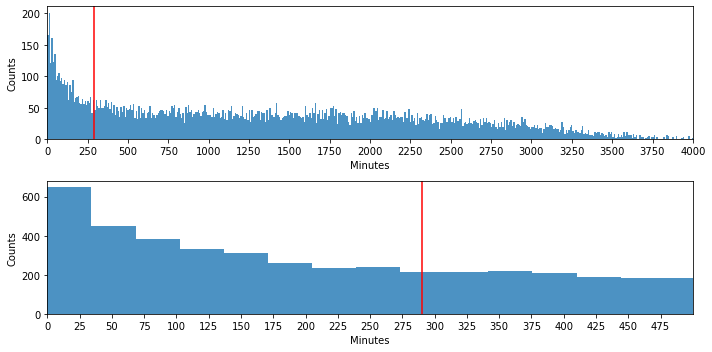

In [52]:
fig = plt.figure(figsize = (10,5))
plt.subplot(211)
a = plt.hist(tot_season["mp"], bins = 500, alpha = 0.8)
plt.axvline(x = 290, c = "r")
plt.xticks(np.arange(0,4010,250))
plt.xlim(0,4000)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.subplot(212)
a = plt.hist(tot_season["mp"], bins = 125, alpha = 0.8)
plt.axvline(x = 290, c = "r")
plt.xticks(np.arange(0,500,25))
plt.xlim(0,500)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.tight_layout()

How RAPTOR works:

https://fivethirtyeight.com/features/how-our-raptor-metric-works/

Essentially rates a player's play and value based on box-score as well as play-by-play metrics. Specifically designed for the modern NBA so it places a greater emphasis on ball-dominant players and 2-way wings while reducing the drastic bias toward centers as done by traditional metrics (sometimes is a little harsh). Named because it correctly predicted raptors winning in 2019 over GSW :(.

Essentially rates how good a player is. Actual data from 2013-2014 onwards but simulated data from 1976-2013.

In [117]:
# store season-pair tuples that match the mask
minute_mask = tot_season["mp"] >290
minute_filter = set(zip(tot_season[minute_mask]["season"], tot_season[minute_mask]["player_id"]))

# only 12887 season-players combinations satisfy this filter
print(len(minute_filter))

# get all salary rows that satisfy this filter
filtered_salaries_ind = []
for i in range(new_salaries.shape[0]):
    value = tuple([new_salaries["season"].values[i], new_salaries["player_id"].values[i]])
    if value in minute_filter:
        filtered_salaries_ind.append(new_salaries.index[i])

filtered_salaries = new_salaries.loc[filtered_salaries_ind,]
# also get rid of those with no salary info
filtered_salaries = filtered_salaries[filtered_salaries["salary"]!=0]

print(filtered_salaries.shape)
# get all Raptor rows that satisfy this filter
filtered_raptor_ind = []
for i in range(new_raptor.shape[0]):
    value = tuple([new_raptor["season"].values[i], new_raptor["player_id"].values[i]])
    if value in minute_filter:
        filtered_raptor_ind.append(new_raptor.index[i])

filtered_raptor = new_raptor.loc[filtered_raptor_ind,]
print(filtered_raptor.shape)


12887
(12091, 6)
(33821, 17)


In [118]:
new_raptor[new_raptor["season_type"] == "TOT"].shape

(15860, 17)

In [119]:
filtered_raptor[filtered_raptor["season_type"] == "TOT"].shape

(12887, 17)

In [147]:
filtered_salaries.value_counts(subset = ["season", "player_id",]).head(8)

season  player_id
2018    kilpase01    4
2019    canaais01    3
2018    liggide01    3
        canaais01    3
2008    mbengdj01    3
2007    anderde01    3
2021    jonesda03    3
2019    monrogr01    3
dtype: int64

In [124]:
# print(filtered_salaries[filtered_salaries["player_id"] == "jonesma05"])
# print(filtered_salaries[filtered_salaries["player_id"] == "stevela01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "watanyu01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "marshna01"])

# print(filtered_salaries[filtered_salaries["player_id"] == "toscaju01"])
# # print(filtered_salaries[filtered_salaries["player_id"] == "brownmo01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "metuch01"])
# print(filtered_salaries[filtered_salaries["player_id"] == "scolalu01"])

In [109]:
# print(filtered_raptor[filtered_raptor["player_id"] == "jonesma05"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "stevela01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "watanyu01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "marshna01"].iloc[:,:5])

# print(filtered_raptor[filtered_raptor["player_id"] == "toscaju01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "brownmo01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "metuch01"].iloc[:,:5])
# print(filtered_raptor[filtered_raptor["player_id"] == "scolalu01"].iloc[:,:5])

#### Merge
---
Now that all sets are cleaned, we can finally join the two dataframes to get final ouput.

In [142]:
# outer join
full_data = filtered_raptor[filtered_raptor["season_type"] != "TOT"].merge(filtered_salaries, on =["player_id", "season", "team"], how ='left')
full_data

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,-0.226163,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20929,Ivica Zubac,zubaciv01,2019,RS,LAL,1120,516,-1.450572,1.532064,0.081491,0.745271,0.745271,0.000000,-2.387528,1.045695,-1.341833,-0.021405,NaN,NaN,NaN
20930,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691,NBA,6481482.0,0.059387
20931,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144,NBA,6481482.0,0.059387
20932,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855,NBA,7000000.0,0.064138


Some players don't have salary information for teams they got traded from in mid-season while others do. For the sake of simplicity and the fact I've spent 15+ hours trying to clean this data, I'm simply going to drop the data

In [152]:
full_data[full_data["salary"].isna()]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary
6,Alaa Abdelnaby,abdelal01,1993,RS,MIL,322,159,-3.210418,-1.687082,-4.897499,-0.175653,-0.175653,0.000000,-3.232559,-1.696312,-4.928871,0.811583,NaN,NaN,NaN
7,Alaa Abdelnaby,abdelal01,1995,RS,PHI,58,30,-19.426711,-5.753303,-25.180014,-0.342015,-0.342015,0.000000,-17.705974,-7.713219,-25.419193,-0.355770,NaN,NaN,NaN
13,Kareem Abdul-Jabbar,abdulka01,1987,PO,LAL,1184,559,0.579291,1.903181,2.482471,1.532849,0.000000,1.532849,1.022664,1.198616,2.221281,-0.401656,NaN,NaN,NaN
14,Kareem Abdul-Jabbar,abdulka01,1987,RS,LAL,5226,2441,0.113020,0.763810,0.876830,4.509804,4.509804,0.000000,0.608637,0.464766,1.073403,-0.159095,NaN,NaN,NaN
33,Tariq Abdul-Wahad,abdulta01,2000,RS,DEN,744,373,-2.255311,-2.638405,-4.893716,-0.406118,-0.406118,0.000000,-2.667245,-2.568502,-5.235747,-0.425209,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20864,Sam Young,youngsa01,2012,RS,PHI,255,135,-6.317442,0.580356,-5.737086,-0.207440,-0.207440,0.000000,-5.936521,-0.405723,-6.342245,0.762183,NaN,NaN,NaN
20880,Thaddeus Young,youngth01,2015,RS,MIN,3205,1605,0.306193,0.403151,0.709344,2.832395,2.832395,0.000000,0.215674,0.493914,0.709589,-0.012254,NaN,NaN,NaN
20913,Tyler Zeller,zellety01,2018,RS,BKN,1456,703,-2.606880,-0.337004,-2.943884,-0.069310,-0.069310,0.000000,-3.137505,-0.599272,-3.736777,-0.328507,NaN,NaN,NaN
20920,George Zidek,zidekge01,1997,RS,DEN,171,88,1.674326,-2.489380,-0.815054,0.087389,0.087389,0.000000,0.754412,-2.163921,-1.409508,0.540321,NaN,NaN,NaN


<AxesSubplot:>

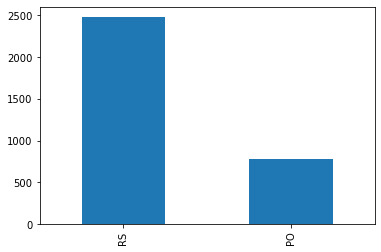

In [159]:
full_data[full_data["salary"].isna()]["season_type"].value_counts().plot(kind = "bar")

(array([557., 521., 121., 282., 652., 252., 195., 176., 245., 255.]),
 array([1985. , 1988.6, 1992.2, 1995.8, 1999.4, 2003. , 2006.6, 2010.2,
        2013.8, 2017.4, 2021. ]),
 <BarContainer object of 10 artists>)

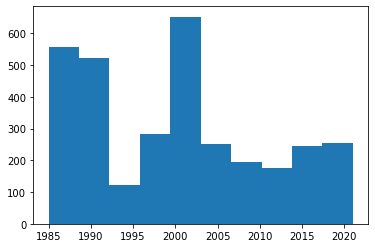

In [158]:
plt.hist(full_data[full_data["salary"].isna()]["season"])

<AxesSubplot:>

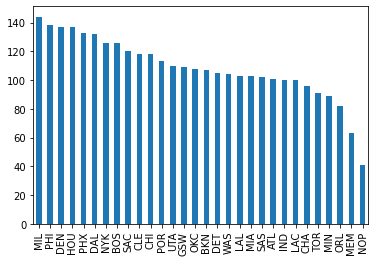

In [157]:
full_data[full_data["salary"].isna()]["team"].value_counts().plot(kind="bar")

In [161]:
full_data.dropna().to_csv("../Data/munged_salary_raptor.csv")